# Dynamic Lattice Manipulation

new experimental feature of the SRG kernel

In [35]:
from hypertiling import HyperbolicTiling
from hypertiling.graphics.svg import *
from hypertiling.graphics.plot import plot_geodesic
import matplotlib.pyplot as plt


# custom plot routine for SRG kernel
def myplot(tiling):
    ax = plot_geodesic(T, ec="0.6", lw=0.7, zorder=3)
    
    # in the SRG kernel, the polygons are stored in a dictionary
    # hence we need to iterate over the keys which are the indices
    for idx in tiling.polygons.keys():
        if idx in T.exposed:
            col = "#ad153d"
        else:
            col = "k"
        
        # extract center coordinate and display index there
        z = tiling.get_center(idx)
        t = ax.text(np.real(z), np.imag(z), str(idx), c=col, ha="center", va="center", fontsize=17*(1-0.7*np.abs(z)), zorder=1)
        t.set_bbox(dict(facecolor='w', edgecolor="none", alpha=0.5))

## General usage

Construct and draw a small lattice to start with. Cells with red labels are called "exposed", they represent the outmost layer and their neigbours are incomplete as they only know about their parents, but not about siblings

In [36]:
T = HyperbolicTiling(7, 3, 2, kernel="SRG", center="vertex")

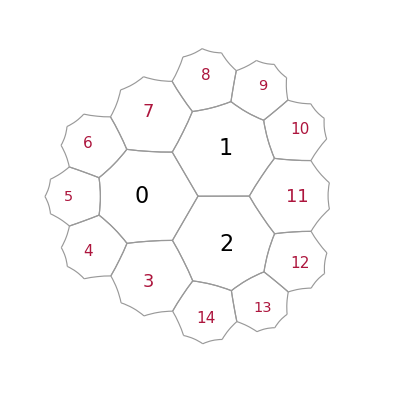

In [37]:
myplot(T)

Upon execution of "add_layer", the vacant spaced around all exposed cells is filled with new polygons

In [38]:
T.add_layer()

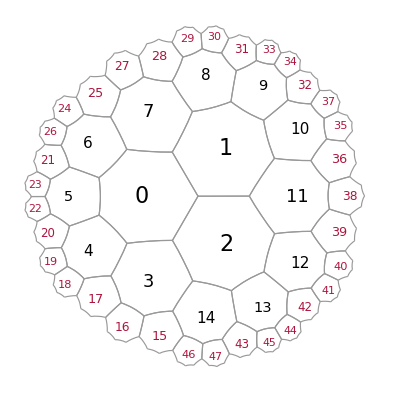

In [39]:
myplot(T)

We can also remove cells, using a list of corresponding indices

In [40]:
T.remove_cells([7,8,9,10,11,12,13,14])
T.remove_cells([1])
T.remove_cells(range(27,36))
T.remove_cells(range(37,42))

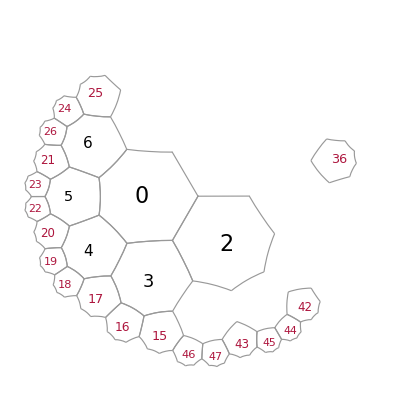

In [41]:
myplot(T)

Let us again add a layer to reconnect the pieces

In [42]:
T.add_layer([0,36])

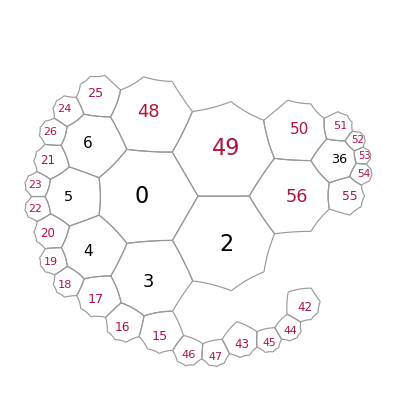

In [43]:
myplot(T)

## Filters

The add_layer function allows to use filters, which can specify the domain in which we want to construct new cells

In [44]:
# this filter allows construct cells only in a certain range of complex angles
def my_angular_filter(z):
    return True if (45 < np.angle(z, deg=True) < 180) else False

In [45]:
T = HyperbolicTiling(5,4, 2, kernel="SRG")

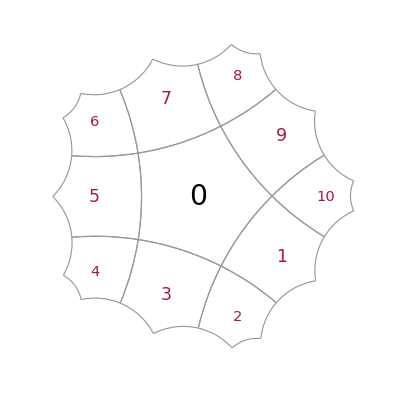

In [46]:
myplot(T)

And this is how it works

In [47]:
T.add_layer(filter = my_angular_filter)
T.add_layer(filter = my_angular_filter)
T.add_layer(filter = my_angular_filter)

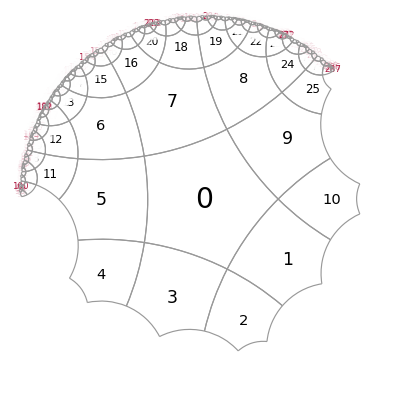

In [48]:
myplot(T)